In [43]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

### Некоторые методы предобработки данных

- Визуализация
- Удаление и корректировка выбросов
- Обработка пропущенных значений
- Обработка категориальных признаков
- Нормализация данных

# Оценка степени ожирения

Даны физические характеристики группы из двух тысяч человек и информация о их привычках. Требуется определить, к какой группе отклонений по весу относится данный человек.

## 1. Загружаем данные

In [244]:
from google.colab import files
# uploaded = files.upload()
data_raw = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

Таблица содержит данные о более 2 тысяч людей

Наряду со стандартными физическими показателями, указаны ответы на  вопросы о привычках. Данные взяты для следующих стран: Колумбия, Перу, Мексика.

In [245]:
data_raw.shape

(2111, 17)


Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [47]:
data_raw.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


А вот последние строки:

In [223]:
data_raw.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,yes,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,yes,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,yes,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,yes,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,yes,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


Мы видим, что столбцы (признаки) имеют имена

- `Gender` - пол
- `Age` - возраст
- `Height` - рост
- `Weight` - вес
- `family_history_with_overweight` - были ли в семье случаи ожирения
- `FAVC` - часто ли ест калорийную пищу (да-нет)
- `FCVC` - употребляет ли овощи (никогда - иногда - всегда). Возможны переходные значения.
- `NCP` - число приемов пищи (один,два - три - более трех). Возможны переходные значения.
- `CAEC` - ест ли между осеовными приемами пищи (нет - иногда - часто)
- `SMOKE` - курит ли (да - нет)
- `CH2O` - объем потребляемой воды (менее литра - от одного до двух - более двух). Возможны переходные значения.
- `SCC` - следит ли за калориями (да - нет)
- `FAF` - физическая активность (отсутствует - 1..2 дня - 2..4 дня - 4..5 дней). Возможны переходные значения.
- `TUE` - сколько времени проводит за девайсами (0..2 часа - 3..5 часов - более 5). Возможны переходные значения.
- `CALC` - употребление алкоголя (нет - иногда - часто - постоянно)
- `MTRANS` - способ транспортации (машина - мотоцикл - велосипед - общественный - пешком)
- `NObeyesdad` - отклонение от нормального веса (меньше нормы - норма - избыточный вес 1 - избыточный вес 2 - ожирение 1 - ожирение 2 - ожирение 3)

Признаки `family_history_with_overweight`, `FAVC`, `SMOKE`, `SCC` - бинарные, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS`, `NObeyesdad` - категориальные, остальные - числовые.

Требуется отнести данного человека к группе по отклонению от нормального веса. Это *задача классификации*.

Имена столбцов (признаков) можно получить таким образом:

In [ ]:
data_raw.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Имена строк (совпадают с номерами)

In [ ]:
data_raw.index

RangeIndex(start=0, stop=2111, step=1)

Столбцы содержащие категориальные значения, имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [48]:
data_raw['CAEC'].dtype

dtype('O')

Так как выборка сравнительно небольшая для 7 признаков, то будем считать все виды избыточного веса за один

In [246]:
for i in range(data_raw.shape[0]):
  if data_raw.at[i, 'NObeyesdad'] == 'Normal_Weight':
    data_raw.at[i, 'NObeyesdad'] = 'norm'
  elif  data_raw.at[i, 'NObeyesdad'] == 'Insufficient_Weight':
    data_raw.at[i, 'NObeyesdad'] = 'low'
  else:
    data_raw.at[i, 'NObeyesdad'] = 'high'

In [247]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['CAEC'] = data_raw['CAEC'].astype('category')
data_raw['MTRANS'] = data_raw['MTRANS'].astype('category')
data_raw['NObeyesdad'] = data_raw['NObeyesdad'].astype('category')
data_raw['SMOKE'] = data_raw['FAVC'].astype('category')
data_raw['CALC'] = data_raw['CALC'].astype('category')
data_raw['SCC'] = data_raw['SCC'].astype('category')
data_raw['FAVC'] = data_raw['FAVC'].astype('category')
data_raw['family_history_with_overweight'] = data_raw['family_history_with_overweight'].astype('category')

In [279]:
data_raw['NObeyesdad'].dtype

CategoricalDtype(categories=['high', 'low', 'norm'], ordered=False)

In [249]:
data_raw['CALC'] = data_raw['CALC'].astype('category')

In [250]:
data_raw['CALC'].dtype

CategoricalDtype(categories=['Always', 'Frequently', 'Sometimes', 'no'], ordered=False)

### Доступ к отдельным элементам и выделение подтаблиц (slice)

  Cпособ доступа    |      Элемент  | Подтаблица
 ------------------ | ------------- | -----------
  Доступ по имени   | `at`, `loc`   | `loc`
  Доступ по номеру  | `iat`, `iloc` | `iloc`


In [ ]:
data_raw.at[2, 'CALC']

'Frequently'

In [ ]:
data_raw.loc[2, 'CALC']

'Frequently'

In [ ]:
data_raw.iat[2, 14]

'Frequently'

In [ ]:
data_raw.iloc[2, 14]

'Frequently'

### Подтаблицы

`loc` и `iloc` (но не `at` и `iat`) позволяют выделять не только отдельные элементы, но и подтаблицы (slice)

In [ ]:
data_raw.loc[[2,3,5], ['Height', 'CAEC', 'CALC']]

,Height,CAEC,CALC
2,1.80,Sometimes,Frequently
3,1.80,Sometimes,Frequently
5,1.62,Sometimes,Sometimes


In [ ]:
data_raw.iloc[[2,3,5], [2,8,14]]

,Height,CAEC,CALC
2,1.80,Sometimes,Frequently
3,1.80,Sometimes,Frequently
5,1.62,Sometimes,Sometimes


In [ ]:
data_raw.loc[[2,3,5], ['Height', 'CAEC', 'CALC']].loc[5, 'CALC']

'Sometimes'

### Целые строки или столбцы:

In [ ]:
data_raw.loc[:, ['CAEC', 'CALC']] 

,CAEC,CALC
0,Sometimes,no
1,Sometimes,Sometimes
2,Sometimes,Frequently
3,Sometimes,Frequently
4,Sometimes,Sometimes
...,...,...
2106,Sometimes,Sometimes
2107,Sometimes,Sometimes
2108,Sometimes,Sometimes
2109,Sometimes,Sometimes


In [96]:
data_raw.loc[[2, 5], :] # или data_raw.loc[[2, 5], ] или data_raw.loc[[2, 5]]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2,1,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
5,1,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,yes,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight


### Так нельзя:

In [ ]:
# data_raw[5, 'Building']

### Так можно:

In [ ]:
data_raw['CALC']

0               no
1        Sometimes
2       Frequently
3       Frequently
4        Sometimes
           ...    
2106     Sometimes
2107     Sometimes
2108     Sometimes
2109     Sometimes
2110     Sometimes
Name: CALC, Length: 2111, dtype: category
Categories (4, object): [Always, Frequently, Sometimes, no]

или так:

In [ ]:
data_raw.CALC

0               no
1        Sometimes
2       Frequently
3       Frequently
4        Sometimes
           ...    
2106     Sometimes
2107     Sometimes
2108     Sometimes
2109     Sometimes
2110     Sometimes
Name: CALC, Length: 2111, dtype: category
Categories (4, object): [Always, Frequently, Sometimes, no]

In [ ]:
data_raw[['CAEC', 'CALC']]

,CAEC,CALC
0,Sometimes,no
1,Sometimes,Sometimes
2,Sometimes,Frequently
3,Sometimes,Frequently
4,Sometimes,Sometimes
...,...,...
2106,Sometimes,Sometimes
2107,Sometimes,Sometimes
2108,Sometimes,Sometimes
2109,Sometimes,Sometimes


### Доступ по булевой маске

In [ ]:
df = data_raw.iloc[:4, 4:8]
df

,family_history_with_overweight,FAVC,FCVC,NCP
0,yes,no,2.0,3.0
1,yes,no,3.0,3.0
2,yes,no,2.0,3.0
3,no,no,3.0,3.0


In [ ]:
df.loc[[True, True, False, True], [False, True, True, False]] # или iloc

,FAVC,FCVC
0,no,2.0
1,no,3.0
3,no,3.0


In [ ]:
df.loc[[True, True, False, True]] # или iloc

,family_history_with_overweight,FAVC,FCVC,NCP
0,yes,no,2.0,3.0
1,yes,no,3.0,3.0
3,no,no,3.0,3.0


In [ ]:
df[[True, True, False, True]]

,family_history_with_overweight,FAVC,FCVC,NCP
0,yes,no,2.0,3.0
1,yes,no,3.0,3.0
3,no,no,3.0,3.0


In [ ]:
df.loc[df.FAVC == 'no', ]

,family_history_with_overweight,FAVC,FCVC,NCP
0,yes,no,2.0,3.0
1,yes,no,3.0,3.0
2,yes,no,2.0,3.0
3,no,no,3.0,3.0


## 2. Боремся с выбросами (outliers)

Наиболее естественная оценка ожирения выводится из соотношения роста и веса.
Построим поэтому диаграмму рассеивания для двух признаков: `Height` и `Weight`.


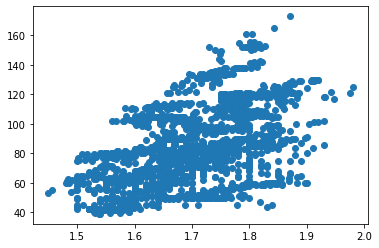

In [225]:
plt.scatter(data_raw['Height'], data_raw['Weight'])
pass

Можно вот так:

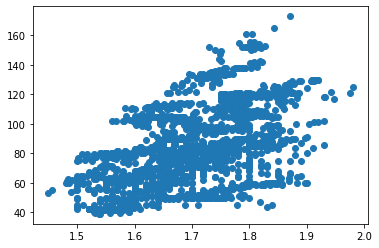

In [280]:
plt.scatter(x='Height', y='Weight', data=data_raw)
pass

Мы видим, что основная масса точек расположена вдоль широкой полосы, проходящей по диагонали графика. Какие-то точки соответствуют людям с чрезмерно большими значениями роста или веса. Это *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, так проявляются редкие патологии.

Для обнаружения выбросов найдем, например, квантили для признаков `Height` и `Weight`:

In [ ]:
data_raw['Height'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    1.500000
0.010    1.500199
0.050    1.548291
0.100    1.580000
0.500    1.700499
0.900    1.823755
0.950    1.850000
0.990    1.909055
0.995    1.916737
Name: Height, dtype: float64

Мы видим, например, что $99\%$ всех значений признака `'Height'` находится в диапазоне от $1.5$ до $1.916$ метров (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

In [ ]:
data_raw['Weight'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     41.364609
0.010     42.000000
0.050     48.500000
0.100     51.154201
0.500     83.000000
0.900    120.921535
0.950    131.916152
0.990    150.333398
0.995    152.515973
Name: Weight, dtype: float64

$99.9\%$ всех значений `'Weight'` находится в диапазоне от $41.364609$ до $152.515973$ кг.


Удалим все строки таблицы, в которых `'Weight'` или `'Height'` выходят за пределы квантилей $0.005$, $0.995$.

In [296]:
rows_to_drop = data_raw[
    (data_raw['Weight'] < data_raw['Weight'].quantile(0.005)) | (data_raw['Weight'] > data_raw['Weight'].quantile(0.995)) | 
    (data_raw['Height']  < data_raw['Height' ].quantile(0.005)) | (data_raw['Height']  > data_raw['Height' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(2069, 17)

In [215]:
rows_to_drop

Int64Index([  16,  165,  183,  198,  334,  344,  349,  395,  464,  502,  522,
             588,  589,  590,  619,  636,  724,  725,  726,  865,  866,  951,
             990, 1066, 1093, 1135, 1166, 1261, 1262, 1349, 1350, 1479, 1605,
            1826, 1838, 1897, 1898, 1910, 1926, 1997, 1998, 2029],
           dtype='int64')

## 3. Визуализация и описательная статистика

Визуализация и описательная статистика - важные этапы анализа данных.
Сводную информацию о признаках можем получить, вызвав метод `describe`:

In [183]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000
mean,24.382371,1.701553,86.423053,2.422696,2.689249,2.010000,1.011253,0.652350
std,6.374717,0.090451,25.538106,0.532611,0.776829,0.611888,0.851536,0.607462
min,14.000000,1.500000,41.397378,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.979810,1.630000,66.000000,2.000000,2.667711,1.596212,0.118271,0.000000
50%,22.865018,1.700216,83.000000,2.396265,3.000000,2.000000,1.000000,0.618087
75%,26.000000,1.767077,106.528811,3.000000,3.000000,2.482933,1.666390,1.000000
max,61.000000,1.915000,152.473675,3.000000,4.000000,3.000000,3.000000,2.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках.
Получил информацию о категориальных:

In [209]:
data.describe(include=['category'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2069,2069,2069,2069,2069,2069,2069,2069,2069
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,yes,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1056,1698,1830,1730,1830,1977,1365,1539,345


Давайте снова построим диаграмму рассеивания для признаков `'Weight'`, `'Height'`:

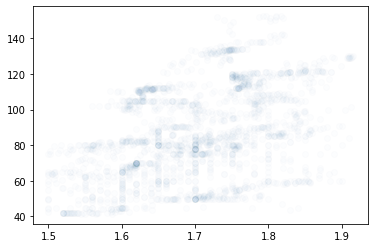

In [56]:
plt.scatter(data['Height'], data['Weight'], alpha=0.01)
pass

Точки выстроились по широкой полосе, идущей из нижнего левого угла в правый верхний: т.е. ожидается значимая корелляция между двумя признаками.

Отрисовка всех точек требует много времени. Тем более, точки накладываются друг на друга и сложно понять сколько точек на том или ином участке графика (особенно, если не использовать параметр `alpha`). Поэтому изобразим только $1000$ случайных точек:

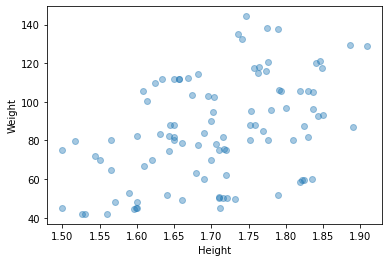

In [59]:
np.random.seed(40)
random_subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)
plt.scatter(data.iloc[random_subset]['Height'], data.iloc[random_subset]['Weight'], alpha=0.4)
plt.xlabel('Height')
plt.ylabel('Weight')
pass

Построим диаграмму рассеивания для признаков `'Age'` и `'Weight'`:

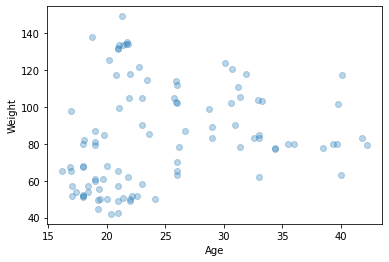

In [ ]:
plt.scatter(data.iloc[random_subset]['Age'], data.iloc[random_subset]['Weight'], alpha = .3)
plt.xlabel('Age')
plt.ylabel('Weight')
pass

Из рисунка понятно, что, по-видимому, никакой зависимости между возрастом и весом нет.
Однако видно, что точки сгущаются с уменьшением обоих значений, т.е. преобладают люди с небольшим весом и возрастом.

Для отрисовки диаграммы рассеивания мы можем воспользоваться более продвинутой функцией `scatterplot` из модуля `seaborn`. Например, в следующей диаграмме цвет маркеров соответствует полу, а размер - весу:

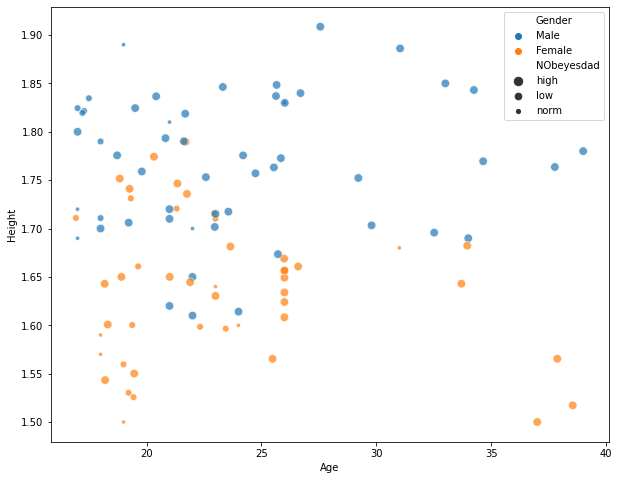

In [253]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Age', y='Height', size='NObeyesdad', hue='Gender', data=data.iloc[random_subset], alpha=0.7)
pass

Мы видим, что в целом, мужчины весят больше, при этом избыточный вес у женщин больше встречается в узких возрастных границах около 21 и 26 лет.

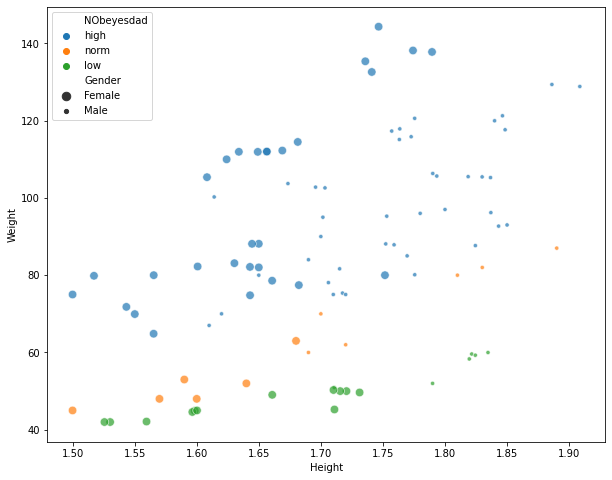

In [254]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Height', y='Weight', size='Gender', hue='NObeyesdad', data=data.iloc[random_subset], alpha=0.7)
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных:

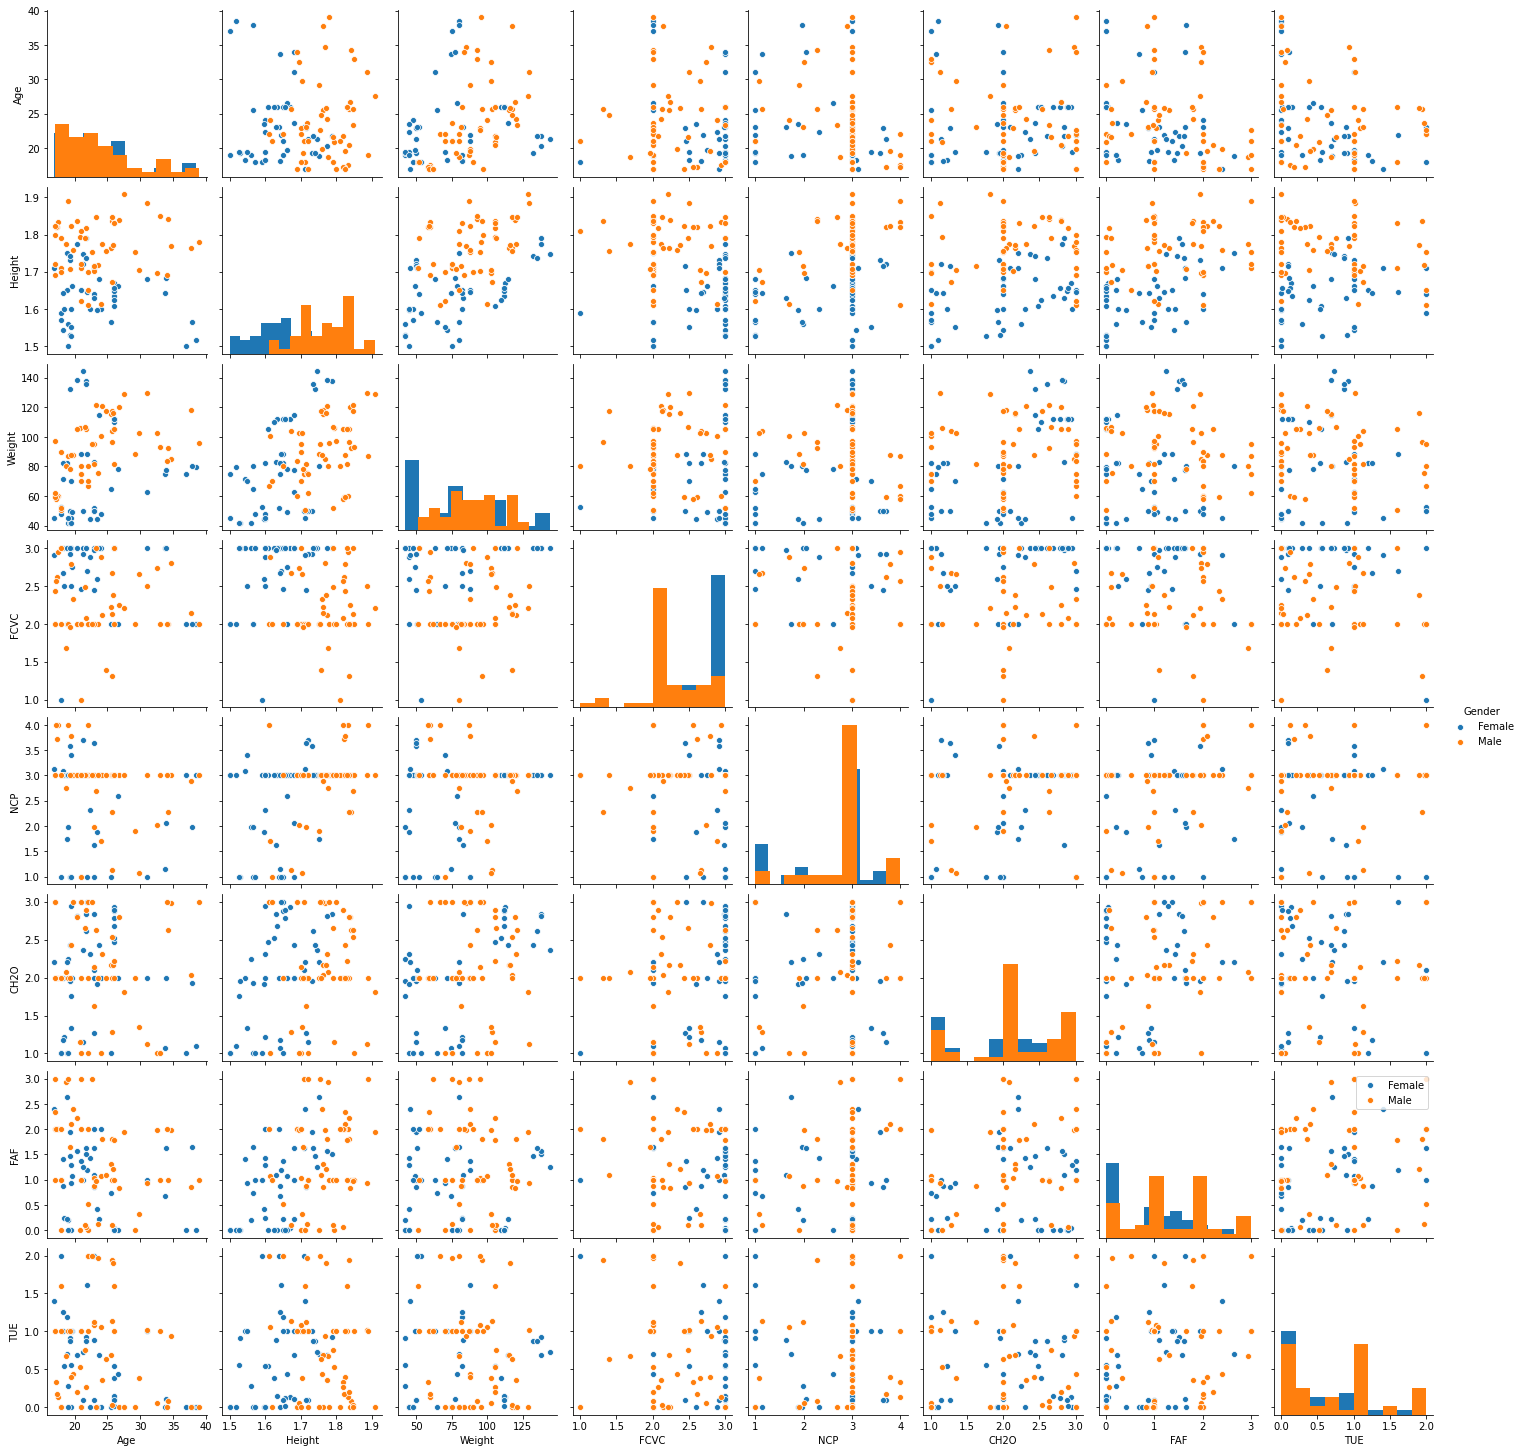

In [255]:
sns.pairplot(data.iloc[random_subset], hue='Gender', diag_kind='hist')
plt.legend()
pass

На диаграммах наблюдается существенная корреляция между `Height`, и `Weight`.

На диагонали расположены гистограммы распределения признаков. Гистограммы можно построить отдельно.

Построить гистограмму можно с помощю функции `plt.hist`, но мы воспользуемся `distplot` из библиотеки `seaborn`.

Можно представить вместе и диаграмму рассеивания для пары признаков и соответствующие гистограммы:

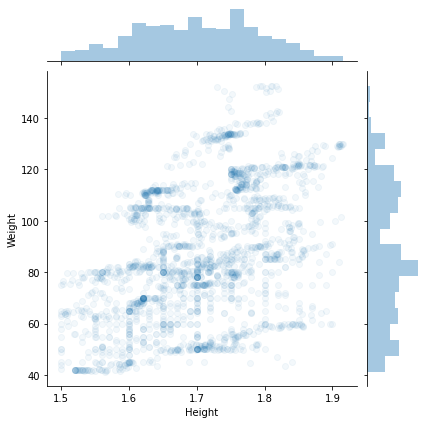

In [64]:
sns.jointplot(x='Height', y='Weight', alpha=.05, data=data)
pass

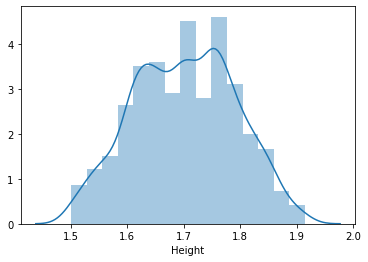

In [66]:
sns.distplot(data['Height'], bins = 15)
pass

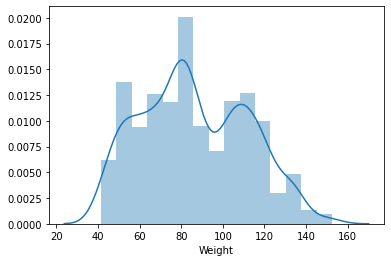

In [67]:
sns.distplot(data['Weight'], bins = 15)
pass

*Ящик с усами* (*бокс-диаграмма*) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

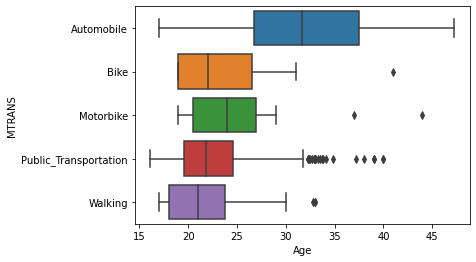

In [ ]:
sns.boxplot(x="Age", y="MTRANS", data=data)
pass

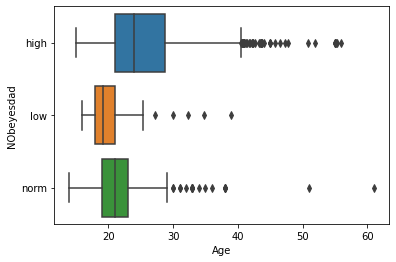

In [257]:
sns.boxplot(x="Age", y="NObeyesdad", data=data)
pass

Также информацию о характере распределения можно получить из *скрипичных графиков* (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

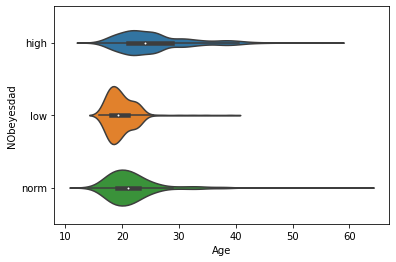

In [256]:
sns.violinplot(x="Age", y="NObeyesdad", data=data)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [258]:
corr_mat = data.corr()
corr_mat

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.034365,0.210495,0.013864,-0.045316,-0.046361,-0.146753,-0.290488
Height,-0.034365,1.000000,0.437817,-0.056953,0.240704,0.199533,0.299169,0.071507
Weight,0.210495,0.437817,1.000000,0.200464,0.095439,0.188638,-0.063280,-0.062779
FCVC,0.013864,-0.056953,0.200464,1.000000,0.033772,0.063868,0.019332,-0.090824
NCP,-0.045316,0.240704,0.095439,0.033772,1.000000,0.045338,0.121994,0.041428
CH2O,-0.046361,0.199533,0.188638,0.063868,0.045338,1.000000,0.163394,0.013060
FAF,-0.146753,0.299169,-0.063280,0.019332,0.121994,0.163394,1.000000,0.058381
TUE,-0.290488,0.071507,-0.062779,-0.090824,0.041428,0.013060,0.058381,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

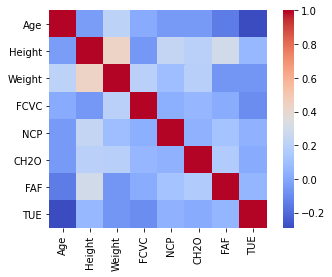

In [259]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [71]:
corr_mat > 0.4

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,True,False,False,False,False,False,False,False
Height,False,True,True,False,False,False,False,False
Weight,False,True,True,False,False,False,False,False
FCVC,False,False,False,True,False,False,False,False
NCP,False,False,False,False,True,False,False,False
CH2O,False,False,False,False,False,True,False,False
FAF,False,False,False,False,False,False,True,False
TUE,False,False,False,False,False,False,False,True


In [73]:
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending=False)

Height  Weight    0.437817
dtype: float64

Значимое значение этого коэффициента вполне объяснимо.

Обратите внимание на небольшую корреляцию между возрастом и весом, а также отрицательное, хотя небольшой по модулю значение корелляции между возрастом и ростом (возрастная деградация позвоночника)

In [ ]:
corr_mat.loc['Age', 'Weight'], corr_mat.loc['Age', 'Height']

(0.2276335722394115, -0.033266966319085045)

Также обратите внимание, что коэффициент корреляции между возрастом и привычкой употребления овощей практически равен нулю

In [74]:
corr_mat.loc['Age', 'FCVC']

0.013864276548922567

Например, выберем все данные, соответствующие женщинам до 30 лет

In [ ]:
data.loc[(data['Gender']=='Female') & (data['Age'] <= 30), :]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
6,Female,23.000000,1.500000,55.000000,yes,yes,3.0,3.0,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Motorbike,Normal_Weight
11,Female,21.000000,1.720000,80.000000,yes,yes,2.0,3.0,Frequently,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II
15,Female,22.000000,1.700000,66.000000,yes,no,3.0,3.0,Always,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Или все данные, соответствующие курящим тридцатилетним людям

In [ ]:
data.loc[(data['Age']==30) & (data['SMOKE']=='yes'), :]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
18,Female,30.0,1.71,82.0,yes,yes,3.0,4.0,Frequently,yes,1.0,no,0.0,0.0,no,Automobile,Overweight_Level_II
68,Male,30.0,1.76,112.0,yes,yes,1.0,3.0,no,yes,2.0,yes,0.0,0.0,Frequently,Automobile,Obesity_Type_II
165,Male,30.0,1.92,130.0,yes,no,2.0,3.0,Sometimes,yes,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Obesity_Type_II


Значения, которые принимают категориальные признаки, можно получить следующим образом:

In [75]:
data['CAEC'].unique()

[Sometimes, Frequently, Always, no]
Categories (4, object): [Sometimes, Frequently, Always, no]

In [78]:
data['CALC'].unique()

[no, Sometimes, Frequently, Always]
Categories (4, object): [no, Sometimes, Frequently, Always]

In [80]:
data['MTRANS'].unique()

[Public_Transportation, Walking, Automobile, Motorbike, Bike]
Categories (5, object): [Public_Transportation, Walking, Automobile, Motorbike, Bike]

In [81]:
data['NObeyesdad'].unique()


[Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Insufficient_Weight, Obesity_Type_II, Obesity_Type_III]
Categories (7, object): [Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I,
                         Insufficient_Weight, Obesity_Type_II, Obesity_Type_III]

In [82]:
data['SMOKE'].unique()

[no, yes]
Categories (2, object): [no, yes]

In [83]:
data['SCC'].unique()

[no, yes]
Categories (2, object): [no, yes]

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [ ]:
data['Age'].value_counts() 

18.000000    126
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
22.882558      1
25.617227      1
21.016849      1
24.001685      1
29.438790      1
Name: Age, Length: 1370, dtype: int64

Далее видим несбалансированность по типу транспортировки. Подавляющее число пользуются общественным транспортом и автомобилем.

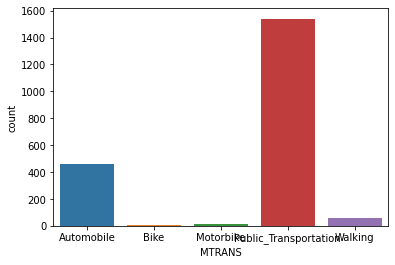

In [86]:
sns.countplot(x='MTRANS', data=data)
pass

In [87]:
data['MTRANS'].value_counts() 

Public_Transportation    1539
Automobile                457
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

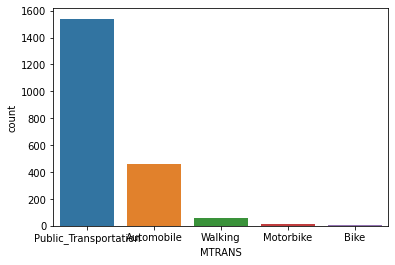

In [88]:
sns.countplot(x='MTRANS', order=data['MTRANS'].value_counts().index, data=data)
pass

Мужчины заметно чаще пользуются автомобилем

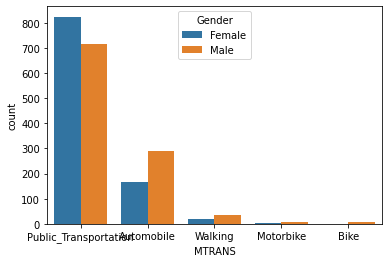

In [89]:
sns.countplot(x='MTRANS', order=data['MTRANS'].value_counts().index, hue='Gender', data=data)
pass

##  4. Отсутствие пропущенных значений 

Пропущенные значения в таблице представлены значениями `np.nan`. 
Таких в нашей таблице нет:

In [91]:
data.isna().sum()  

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [186]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000
mean,24.382371,1.701553,86.423053,2.422696,2.689249,2.010000,1.011253,0.652350
std,6.374717,0.090451,25.538106,0.532611,0.776829,0.611888,0.851536,0.607462
min,14.000000,1.500000,41.397378,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.979810,1.630000,66.000000,2.000000,2.667711,1.596212,0.118271,0.000000
50%,22.865018,1.700216,83.000000,2.396265,3.000000,2.000000,1.000000,0.618087
75%,26.000000,1.767077,106.528811,3.000000,3.000000,2.482933,1.666390,1.000000
max,61.000000,1.915000,152.473675,3.000000,4.000000,3.000000,3.000000,2.000000


In [211]:
data.describe(include=['category'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2069,2069,2069,2069,2069,2069,2069,2069,2069
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,yes,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1056,1698,1830,1730,1830,1977,1365,1539,345


## 5. Бинаризация и векторизация номинальных признаков

Определяем бинарные и небинарные признаки

In [297]:
data_describe = data.describe(include = ['category'])
binary_columns = [c for c in data_describe if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in data_describe if data_describe[c]['unique'] > 2]
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']

print(binary_columns)
print(nonbinary_columns)
print(categorical_columns)
print(numerical_columns)


['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [298]:
data['Gender'] = pd.factorize(data['Gender'])[0]
data['family_history_with_overweight'] = pd.factorize(data['family_history_with_overweight'])[0]
data['FAVC'] = pd.factorize(data['FAVC'])[0]
data['SMOKE'] = pd.factorize(data['SMOKE'])[0]
data['SCC'] = pd.factorize(data['SCC'])[0]


In [283]:
# data['NObeyesdad'] = pd.factorize(data['NObeyesdad'])[0]
# data['NObeyesdad'].unique()

array([0, 1, 2])

In [262]:
# nonbinary_columns.remove('NObeyesdad')

In [287]:
print(nonbinary_columns)

['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']


К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `CALC` принимает 4 различных значения: 

In [135]:
data['CALC'].unique().size

4

In [299]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'] ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']


In [ ]:
Создадим dummies - данные для таких признаков

In [300]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad_high',
       'NObeyesdad_low', 'NObeyesdad_norm'],
      dtype='object')


Нормализуем численные признаки

In [301]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000
mean,24.382371,1.701553,86.423053,2.422696,2.689249,2.010000,1.011253,0.652350
std,6.374717,0.090451,25.538106,0.532611,0.776829,0.611888,0.851536,0.607462
min,14.000000,1.500000,41.397378,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.979810,1.630000,66.000000,2.000000,2.667711,1.596212,0.118271,0.000000
50%,22.865018,1.700216,83.000000,2.396265,3.000000,2.000000,1.000000,0.618087
75%,26.000000,1.767077,106.528811,3.000000,3.000000,2.482933,1.666390,1.000000
max,61.000000,1.915000,152.473675,3.000000,4.000000,3.000000,3.000000,2.000000


In [302]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03
mean,1.256138e-15,3.093286e-14,2.887975e-16,-5.346456e-15,-1.867954e-15,-2.402675e-15,-1.381185e-15,-2.196440e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.628680e+00,-2.228309e+00,-1.763078e+00,-2.671171e+00,-2.174544e+00,-1.650629e+00,-1.187564e+00,-1.073894e+00
25%,-6.906284e-01,-7.910654e-01,-7.997090e-01,-7.936291e-01,-2.772500e-02,-6.762484e-01,-1.048672e+00,-1.073894e+00
50%,-2.380267e-01,-1.477711e-02,-1.340371e-01,-4.962497e-02,4.000255e-01,-1.634356e-02,-1.321466e-02,-5.640350e-02
75%,2.537571e-01,7.244193e-01,7.872846e-01,1.083913e+00,4.000255e-01,7.729069e-01,7.693597e-01,5.722990e-01
max,5.744197e+00,2.359814e+00,2.586355e+00,1.083913e+00,1.687310e+00,1.617942e+00,2.335483e+00,2.218492e+00


In [303]:
normal_data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(normal_data.shape)
normal_data.describe()
#print data.columns

(2069, 29)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_high,NObeyesdad_low,NObeyesdad_norm,Gender,family_history_with_overweight,FAVC,SMOKE,SCC
count,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03,2.069000e+03,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.00000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000
mean,1.256138e-15,3.093286e-14,2.887975e-16,-5.346456e-15,-1.867954e-15,-2.402675e-15,-1.381185e-15,-2.196440e-15,0.024650,0.114548,0.836153,0.024650,0.000483,0.033349,0.659739,0.306428,0.22088,0.003383,0.005317,0.743838,0.026583,0.735621,0.126148,0.138231,0.510391,0.179314,0.884485,0.884485,0.044466
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.155092,0.318553,0.370226,0.155092,0.021985,0.179591,0.473911,0.461121,0.41494,0.058082,0.072738,0.436618,0.160900,0.441109,0.332096,0.345226,0.500013,0.383707,0.319719,0.319719,0.206178
min,-1.628680e+00,-2.228309e+00,-1.763078e+00,-2.671171e+00,-2.174544e+00,-1.650629e+00,-1.187564e+00,-1.073894e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.906284e-01,-7.910654e-01,-7.997090e-01,-7.936291e-01,-2.772500e-02,-6.762484e-01,-1.048672e+00,-1.073894e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,-2.380267e-01,-1.477711e-02,-1.340371e-01,-4.962497e-02,4.000255e-01,-1.634356e-02,-1.321466e-02,-5.640350e-02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,2.537571e-01,7.244193e-01,7.872846e-01,1.083913e+00,4.000255e-01,7.729069e-01,7.693597e-01,5.722990e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,5.744197e+00,2.359814e+00,2.586355e+00,1.083913e+00,1.687310e+00,1.617942e+00,2.335483e+00,2.218492e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [304]:
normal_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_high,NObeyesdad_low,NObeyesdad_norm,Gender,family_history_with_overweight,FAVC,SMOKE,SCC
0,-0.530592,-0.901623,-0.878023,-0.793629,0.400025,-0.016344,-1.187564,0.572299,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,-0.530592,-2.007194,-1.191281,1.083913,0.400025,1.617942,2.335483,-1.073894,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,-0.216852,1.088407,-0.368980,-0.793629,0.400025,-0.016344,1.161134,0.572299,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0.410627,1.088407,0.022592,1.083913,0.400025,-0.016344,1.161134,-1.073894,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0
4,-0.373722,0.867292,0.132232,-0.793629,-2.174544,-0.016344,-1.187564,-1.073894,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0


# X и y

In [312]:
X = normal_data.drop('NObeyesdad_high', axis = 1) # выбрасываем столбцы 'NObeyesdad_high', 'NObeyesdad_low', 'NObeyesdad_norm'
y_high = normal_data['NObeyesdad_high']
X = X.drop('NObeyesdad_low', axis = 1)
y_low = normal_data['NObeyesdad_low']
X = X.drop('NObeyesdad_norm', axis = 1)
y_norm = normal_data['NObeyesdad_norm']

feature_names = X.columns

In [313]:
X = X.to_numpy()
# y_high = np.array(y_high != 'NObeyesdad_high', dtype='int')
y_high = y_high.to_numpy()
y_norm = y_norm.to_numpy()
y_low = y_low.to_numpy()

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [316]:
# type(X)
type(y_high)

numpy.ndarray

In [320]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train_low, y_test_low = train_test_split(X, y_low, test_size = 0.3, random_state = seed)
X_train, X_test, y_train_norm, y_test_norm = train_test_split(X, y_norm, test_size = 0.3, random_state = seed)
X_train, X_test, y_train_high, y_test_high = train_test_split(X, y_high, test_size = 0.3, random_state = seed)

N_train, _ = X_train1.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1448 621


In [362]:
from sklearn.neighbors import KNeighborsClassifier
nn = 4
knn_low = KNeighborsClassifier(n_neighbors = nn)
knn_norm = KNeighborsClassifier(n_neighbors = nn)
knn_high = KNeighborsClassifier(n_neighbors = nn)

#knn.set_params(n_neighbors=10)
knn_low.fit(X_train, y_train_low)
knn_norm.fit(X_train, y_train_norm)
knn_high.fit(X_train, y_train_high)

y_test_predict_low = knn_low.predict(X_test)
y_test_predict_norm = knn_norm.predict(X_test)
y_test_predict_high = knn_high.predict(X_test)

err_test_low  = np.mean(y_test_low  != y_test_predict_low)
err_test_norm  = np.mean(y_test_norm  != y_test_predict_norm)
err_test_high  = np.mean(y_test_high  != y_test_predict_high)

print(err_test_low)
print(err_test_norm)
print(err_test_high)

0.01932367149758454
0.13526570048309178
0.09178743961352658


Сравнивая результаты для разных значений nn, находим, что


1.   Наилучшая точность для high и low значений достигается при nn = 4: 0.019, 0.13, 0.09
2.   При проверки norm - значения методом исключения high и low значений достигается гораздо большая точность, чем при непосредственной проверке на принадлежность к norm - классу.



In [348]:
y_test_predict_low = knn_low.predict(X_test)
y_test_predict_norm = knn_norm.predict(X_test)
y_test_predict_high = knn_high.predict(X_test)

err_test_low  = np.mean(y_test_low  != y_test_predict_low)
err_test_norm  = np.mean(y_test_norm  != y_test_predict_norm)
err_test_high  = np.mean(y_test_high  != y_test_predict_high)

print(err_test_low)
print(err_test_norm)
print(err_test_high)

0.024154589371980676
0.12238325281803543
0.09339774557165861
